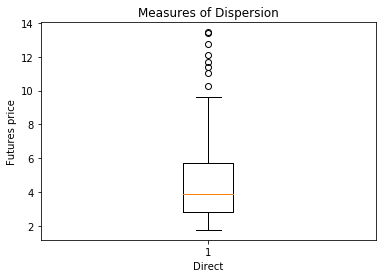

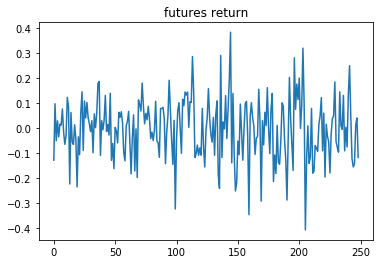

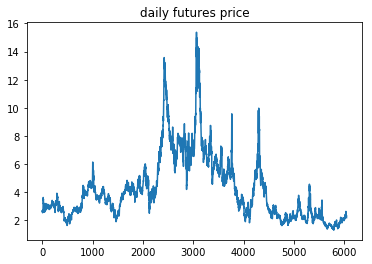

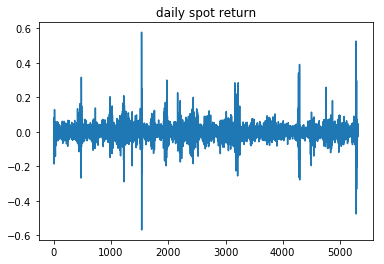

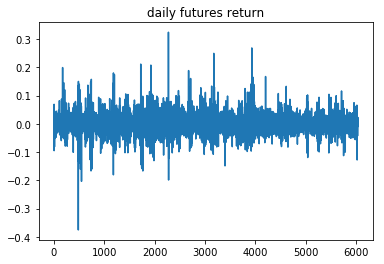


--------------------- Spot_daily.Spot -------------------
DescribeResult(nobs=5318, minmax=(1.05, 18.48), mean=4.378676194057916, variance=4.9711113561042257, skewness=1.5067872389070984, kurtosis=2.907115157608411)

--------------------- daily_spot_return -------------------
DescribeResult(nobs=5317, minmax=(-0.56817504133109242, 0.5766634490306668), mean=-7.236016129227899e-05, variance=0.0020888699798032573, skewness=0.5648869065566638, kurtosis=23.86294930268218)

--------------------- daily_futures_return -------------------
DescribeResult(nobs=6043, minmax=(-0.3757486357796872, 0.32435377704788548), mean=3.3296245174656423e-05, variance=0.0012543564170064991, skewness=0.22191495601643277, kurtosis=6.945059778283632)

--------------------- futures_daily.Futures -------------------
DescribeResult(nobs=6044, minmax=(1.3230000000000002, 15.378), mean=4.1665610522832557, variance=5.2290306202998025, skewness=1.532933941967112, kurtosis=2.798864746388529)


In [111]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.preprocessing import Imputer
import math
import os

class BoxJenkins(object):
    
    price_monthly = None
    volume = None
    spot_daily = None
    futures_daily = None
    spot_weekly = None
    futures_weekly = None
    spot_return = None
    futures_return = None
    daily_spot_return = None
    daily_futures_return = None
   
    def readInData(self):
        # read in data and drop the row with missing value
        self.price_monthly = pd.read_csv("price.csv",header=0).dropna()
        self.volume = pd.read_csv("Natural_Gas_Volume.csv",header=0).dropna()
        self.spot_daily = pd.read_csv("Henry_Hub_Natural_Gas_Spot_Price.csv",header=0).dropna()
        self.futures_daily = pd.read_csv("Natural_Gas_Futures_Contract_1.csv",header=0).dropna()
        self.spot_weekly = pd.read_csv("Henry_Hub_Natural_Gas_Spot_Price_weekly.csv",header=0).dropna()
        self.futures_weekly = pd.read_csv("Natural_Gas_Futures_Contract_1_weekly.csv",header=0).dropna()
        
    def dataCleaning(self):
        self.price_monthly = self.price_monthly.dropna()
        self.volume = self.volume.dropna()
        self.spot_daily = self.spot_daily.dropna()
        self.futures_daily = self.futures_daily.dropna()
        self.spot_weekly = self.spot_weekly.dropna()
        self.futures_weekly = self.futures_weekly.dropna()
        
    def identification(self):
        # Measures of Dispersion 体现monthly future price的离散程度
        plt.xlabel('Direct')
        plt.ylabel('Futures price')
        plt.title('Measures of Dispersion')
        plt.boxplot(self.price_monthly['Futures Price'])
        plt.show()
        
        spot_return = np.diff(np.log(np.array(self.price_monthly['Spot Price'])[::-1]))
        self.futures_return = np.diff(np.log(np.array(self.price_monthly['Futures Price'])[::-1]))
        
        # 观察future return
        plt.title('futures return')
        plt.plot(self.futures_return)
        plt.show()
        
        # daily future price
        plt.title('daily futures price')
        plt.plot(self.futures_daily['Futures'])
        plt.show()
        ;
        
        # daily spot return
        self.daily_spot_return = np.diff(np.log(np.array(self.spot_daily['Spot'])[::-1]))
        plt.title('daily spot return')
        plt.plot(self.daily_spot_return)
        plt.show()
        
        # daily future return
        self.daily_futures_return = np.diff(np.log(np.array(self.futures_daily['Futures'])[::-1]))
        plt.title('daily futures return')
        plt.plot(self.daily_futures_return)
        plt.show()
        
        # show basic math inform of arrays 
        print "\n--------------------- Spot_daily.Spot -------------------"
        print stats.describe(np.array(self.spot_daily['Spot']))
        print "\n--------------------- daily_spot_return -------------------"
        print stats.describe(np.array(self.daily_spot_return))
        print "\n--------------------- daily_futures_return -------------------"
        print stats.describe(np.array(self.daily_futures_return))
        print "\n--------------------- futures_daily.Futures -------------------"
        print stats.describe(np.array(self.futures_daily['Futures']))
    
    def modelInit(self):
        
        ;
    
    def modelTraining(self):
        ;
        
    def modelChecking(self):
        ;
        
    def modelPerformance(self):
        ;
    
bj = BoxJenkins()
bj.readInData()
bj.dataCleaning()
bj.identification()
        
    